In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
def cal_corr(num_col,data,ann = True):
    corr = data[num_col].corr()
    sns.heatmap(data = corr, annot = ann)
    plt.show()

In [5]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [9]:
df.rename(columns={'label': 'crops'}, inplace=True)

In [11]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
df['crops'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
df['crops'].value_counts()

crops
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [17]:
float_col = df.select_dtypes(include=['float64']).columns
for i in float_col:
   df[i] = df[i].round(1)
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,crops
0,90,42,43,20.9,82.0,6.5,202.9,rice
1,85,58,41,21.8,80.3,7.0,226.7,rice
2,60,55,44,23.0,82.3,7.8,264.0,rice
3,74,35,40,26.5,80.2,7.0,242.9,rice
4,78,42,42,20.1,81.6,7.6,262.7,rice
5,69,37,42,23.1,83.4,7.1,251.1,rice
6,69,55,38,22.7,82.6,5.7,271.3,rice
7,94,53,40,20.3,82.9,5.7,242.0,rice
8,89,54,38,24.5,83.5,6.7,230.4,rice
9,68,58,38,23.2,83.0,6.3,221.2,rice


In [19]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.615545,71.480727,6.470045,103.463909
std,36.917334,32.985883,50.647931,5.063600,22.264189,0.774830,54.958509
min,0.000000,5.000000,5.000000,8.800000,14.300000,3.500000,20.200000
25%,21.000000,28.000000,20.000000,22.800000,60.275000,6.000000,64.575000
50%,37.000000,51.000000,32.000000,25.600000,80.500000,6.400000,94.900000
75%,84.250000,68.000000,49.000000,28.600000,89.925000,6.900000,124.250000
max,140.000000,145.000000,205.000000,43.700000,100.000000,9.900000,298.600000


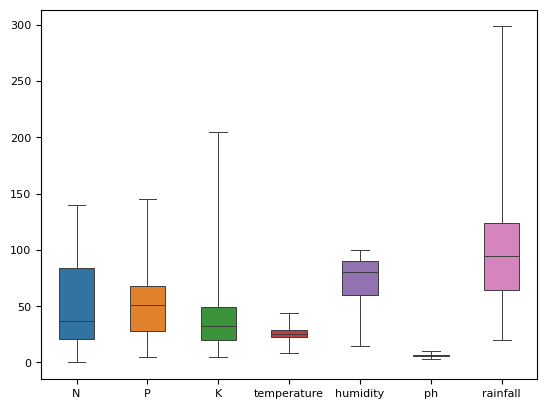

In [21]:
sns.boxplot(data=df, whis=np.inf,width=0.5, linewidth = 0.7).tick_params(labelsize=8)  
plt.show()

 as this agriculture and there are outliers then let's start by getting outliers and see if it has a meaning or there is something wrong

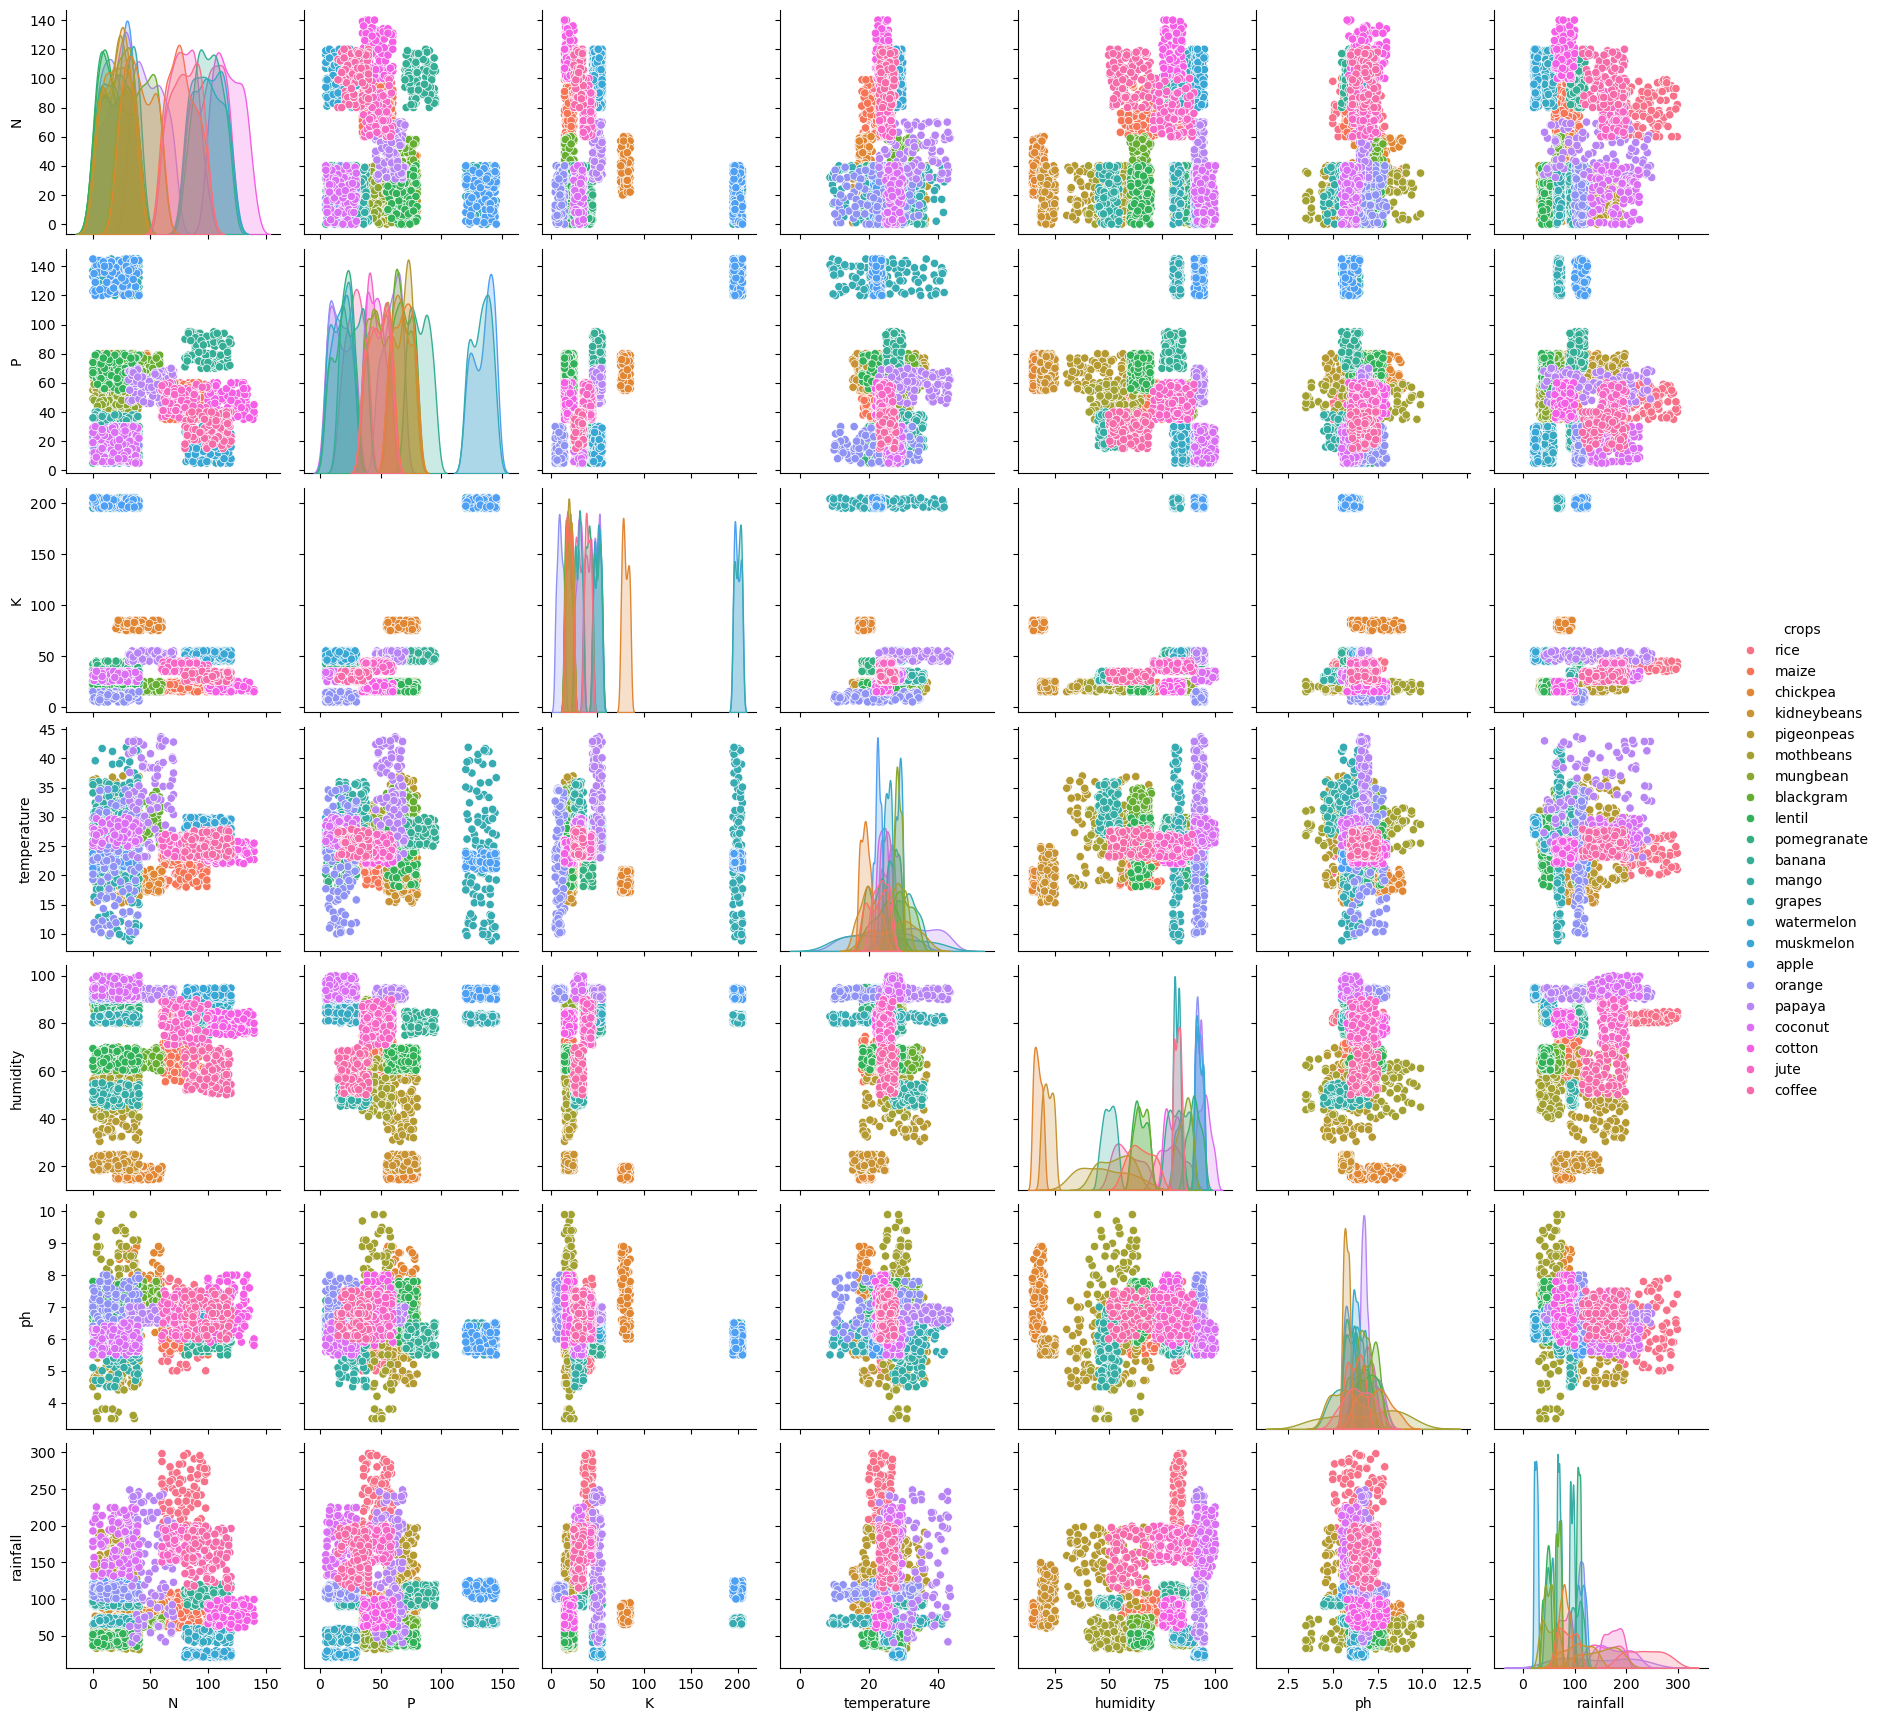

In [24]:
sns.pairplot(df,hue = 'crops' )
plt.show()

from the previous plot we will see that the oultliers found in different columns are needed as it is useful for some crops

when seeing relation between pH and other columns we will see that k,p columns make values in different ranges but the other columns will be in the same range

In [27]:
num_col = df.select_dtypes(include=['float64','int64']).columns

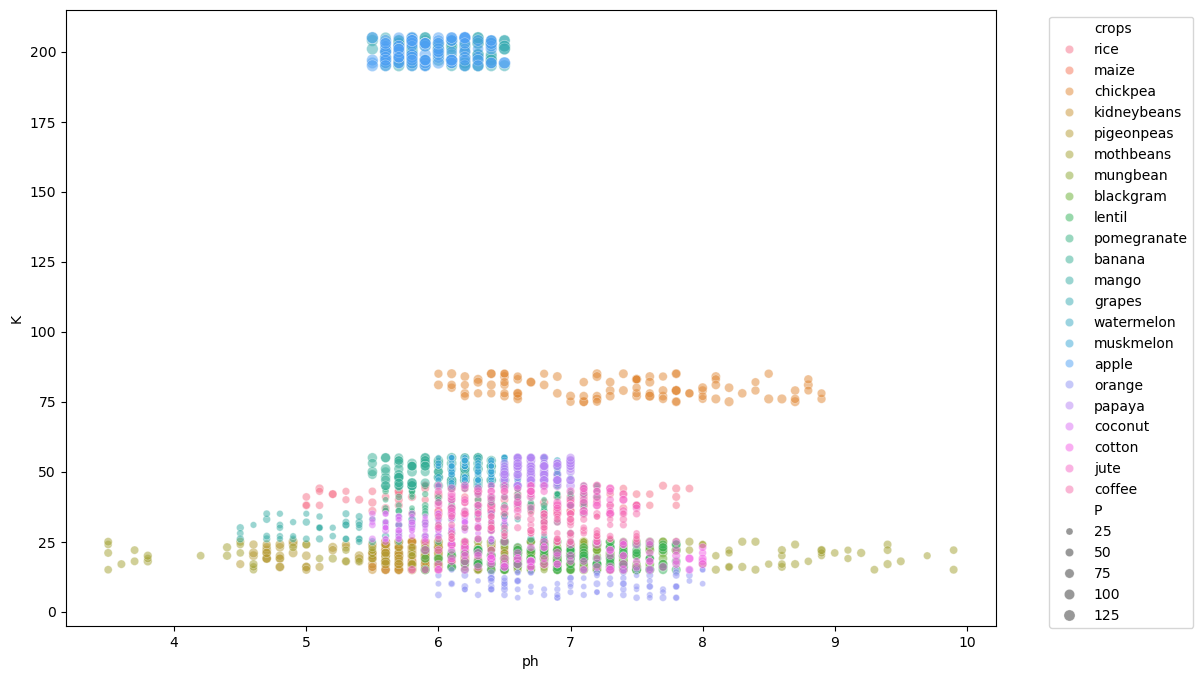

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df,x='ph',y= 'K',size='P', hue ='crops', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

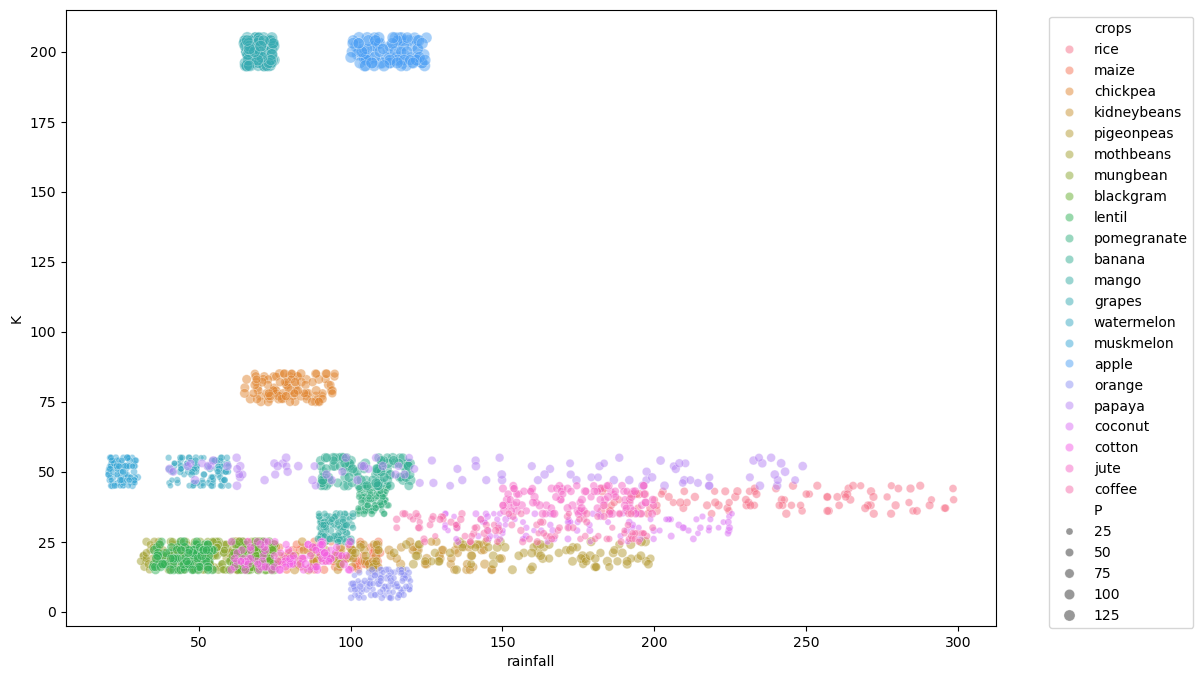

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df,x='rainfall',y= 'K',size='P', hue ='crops', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

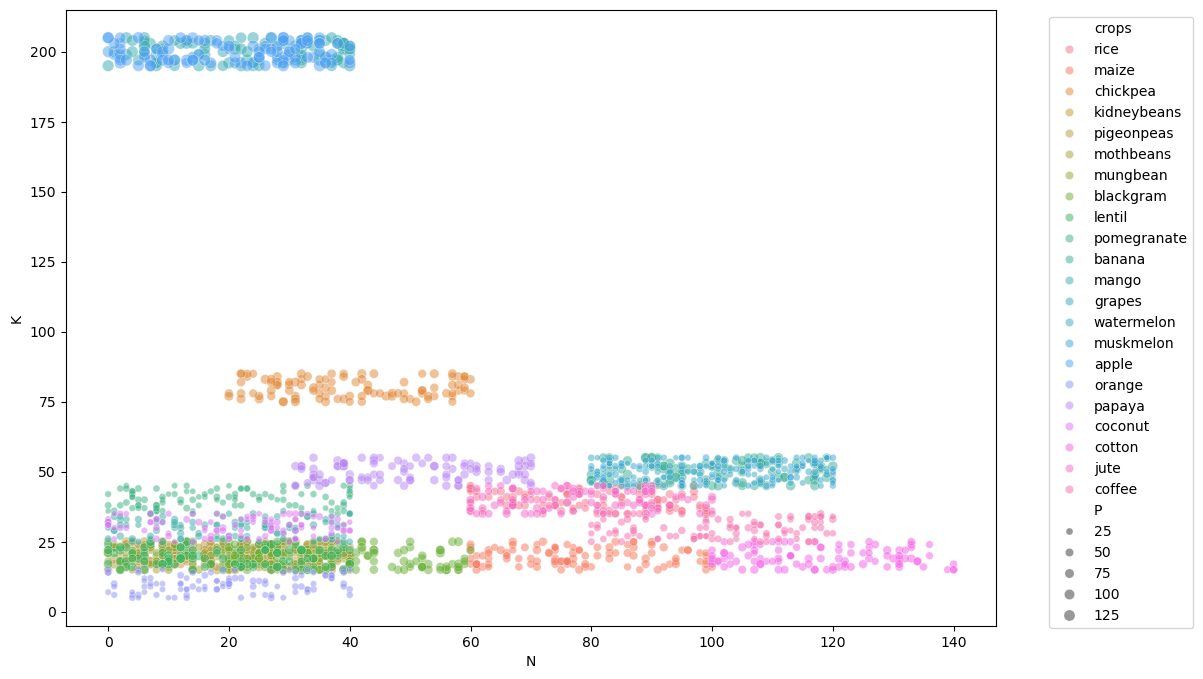

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df,x='N',y= 'K',size='P', hue ='crops', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

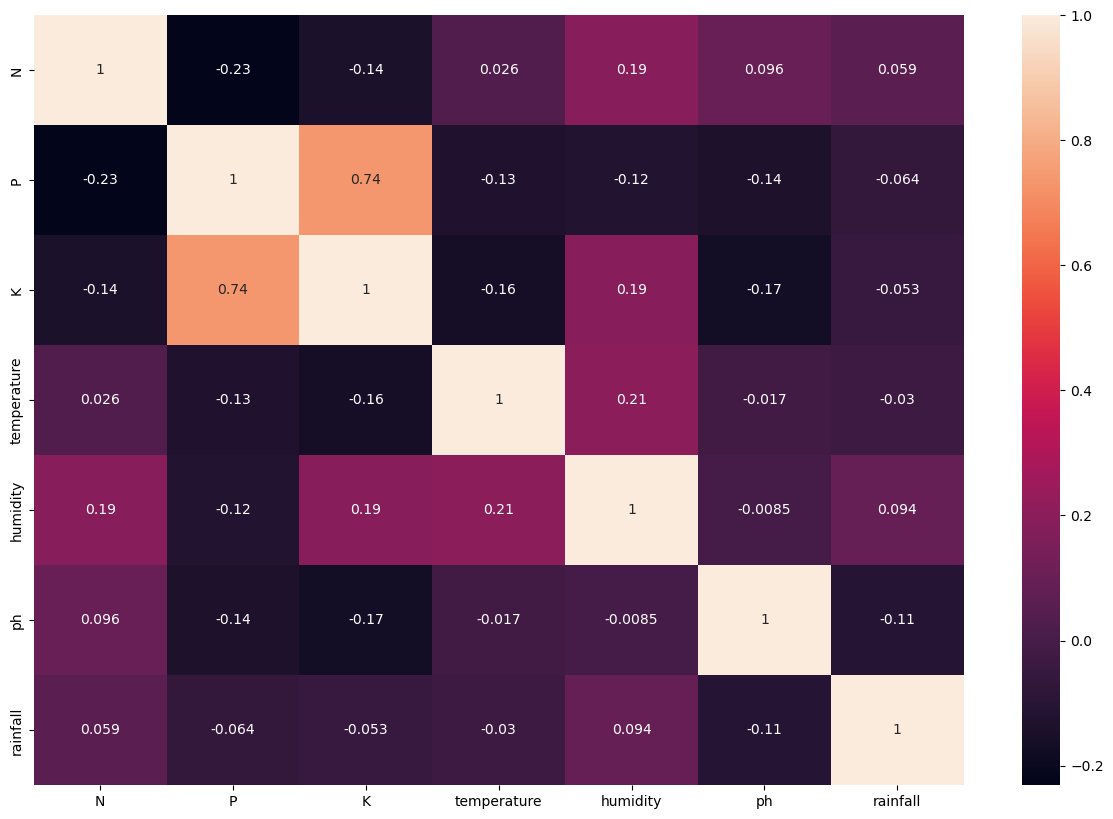

In [31]:
plt.figure(figsize=(15, 10))
cal_corr(num_col,df)

from seeing the correlation we will found that the highest correlation with temperature column is humidity
As N,K,P and pH are in the soil then we can apply dimensionality reduction PCA on it 

In [33]:
scaler = StandardScaler()
col_scale = ['ph','N','K','P']
X_scaled = scaler.fit_transform(df[col_scale])
pca = PCA(n_components=1)
df['soil fertility'] = pca.fit_transform(X_scaled)
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,crops,soil fertility
0,90,42,43,20.9,82.0,6.5,202.9,rice,-0.623581
1,85,58,41,21.8,80.3,7.0,226.7,rice,-0.457208
2,60,55,44,23.0,82.3,7.8,264.0,rice,-0.541192
3,74,35,40,26.5,80.2,7.0,242.9,rice,-0.836663
4,78,42,42,20.1,81.6,7.6,262.7,rice,-0.905185
5,69,37,42,23.1,83.4,7.1,251.1,rice,-0.764037
6,69,55,38,22.7,82.6,5.7,271.3,rice,0.009746
7,94,53,40,20.3,82.9,5.7,242.0,rice,-0.209014
8,89,54,38,24.5,83.5,6.7,230.4,rice,-0.507331
9,68,58,38,23.2,83.0,6.3,221.2,rice,-0.122708


In [34]:
col_scale2 = ['humidity','temperature']
X_scaled2 = scaler.fit_transform(df[col_scale2])
dbscan_pca = DBSCAN(eps=0.3, min_samples=3)
y_pred = dbscan_pca.fit_predict(X_scaled2)
counts = np.unique(y_pred, return_counts=True)
counts

(array([-1,  0,  1,  2], dtype=int64),
 array([   2, 1989,  200,    9], dtype=int64))

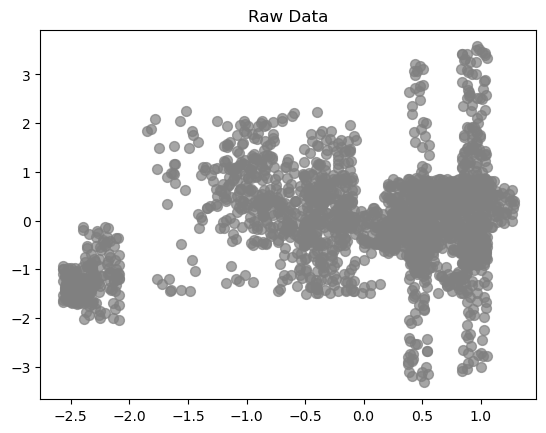

In [35]:
plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], s=50, c='gray', alpha=0.7)
plt.title('Raw Data')
plt.show()

In [36]:
df['season'] = pd.Series(y_pred)
df.head(15)

,N,P,K,temperature,humidity,ph,rainfall,crops,soil fertility,season
0,90,42,43,20.9,82.0,6.5,202.9,rice,-0.623581,0
1,85,58,41,21.8,80.3,7.0,226.7,rice,-0.457208,0
2,60,55,44,23.0,82.3,7.8,264.0,rice,-0.541192,0
3,74,35,40,26.5,80.2,7.0,242.9,rice,-0.836663,0
4,78,42,42,20.1,81.6,7.6,262.7,rice,-0.905185,0
5,69,37,42,23.1,83.4,7.1,251.1,rice,-0.764037,0
6,69,55,38,22.7,82.6,5.7,271.3,rice,0.009746,0
7,94,53,40,20.3,82.9,5.7,242.0,rice,-0.209014,0
8,89,54,38,24.5,83.5,6.7,230.4,rice,-0.507331,0
9,68,58,38,23.2,83.0,6.3,221.2,rice,-0.122708,0


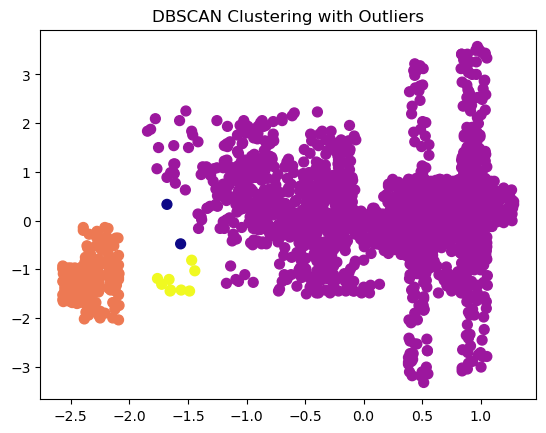

In [37]:
plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=y_pred, cmap='plasma', s=50)
plt.title('DBSCAN Clustering with Outliers')
plt.show()

In [38]:
index_names = df[ df['season'] == -1 ].index 
df.drop(index_names, inplace = True) 

In [39]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crops',
       'soil fertility', 'season'],
      dtype='object')

In [40]:
col_to_drop = ['N', 'P', 'K', 'temperature', 'humidity', 'ph'] 
df2 = df.drop(col_to_drop, axis=1)
df2.head()

,rainfall,crops,soil fertility,season
0,202.9,rice,-0.623581,0
1,226.7,rice,-0.457208,0
2,264.0,rice,-0.541192,0
3,242.9,rice,-0.836663,0
4,262.7,rice,-0.905185,0


apply encoding

In [42]:
label_encoder = LabelEncoder()
df2['crops'] = label_encoder.fit_transform(df['crops'])


applying classification

In [44]:
X = df2.drop('crops', axis=1)
y = df2['crops']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
df2.head()

,rainfall,crops,soil fertility,season
0,202.9,20,-0.623581,0
1,226.7,20,-0.457208,0
2,264.0,20,-0.541192,0
3,242.9,20,-0.836663,0
4,262.7,20,-0.905185,0


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid) 
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 9


In [48]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=best_k),
    'BaggingClassifier': BaggingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [49]:
models_acc = dict()
for m_name,m_model in models.items():
    m_model.fit(X_train_scaled,y_train)
    y_pred = m_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    models_acc[m_name] = accuracy
    print(f"Accuracy of {m_name}: {accuracy:.2f}")

Accuracy of LogisticRegression: 0.67
Accuracy of DecisionTreeClassifier: 0.70
Accuracy of SVC: 0.73
Accuracy of GaussianNB: 0.73
Accuracy of KNeighborsClassifier: 0.74
Accuracy of BaggingClassifier: 0.71


C:\Users\asust\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoostClassifier: 0.12
Accuracy of GradientBoostingClassifier: 0.74
Accuracy of XGBClassifier: 0.70


In [50]:
df['crops'] = label_encoder.fit_transform(df['crops'])

In [73]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crops',
       'soil fertility', 'season'],
      dtype='object')

In [75]:
X2 = df.drop(['crops','N', 'P', 'K','season','ph'], axis=1)
y2 = df['crops']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [77]:
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

In [79]:
param_grid2 = {'n_neighbors': range(1, 20)}
knn2 = KNeighborsClassifier()
grid_search2 = GridSearchCV(knn2, param_grid2) 
grid_search2.fit(X_train_scaled2, y_train2)
best_k2 = grid_search2.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 9


In [81]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=best_k),
    'BaggingClassifier': BaggingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [83]:
for m_name,m_model in models.items():
    m_model.fit(X_train_scaled2,y_train2)
    y_pred = m_model.predict(X_test_scaled2)
    accuracy = accuracy_score(y_test2, y_pred)
    models_acc[m_name] = accuracy
    print(f"Accuracy of {m_name}: {accuracy:.2f}")

Accuracy of LogisticRegression: 0.67
Accuracy of DecisionTreeClassifier: 0.69
Accuracy of SVC: 0.73
Accuracy of GaussianNB: 0.73
Accuracy of KNeighborsClassifier: 0.74
Accuracy of BaggingClassifier: 0.70


C:\Users\asust\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoostClassifier: 0.12
Accuracy of GradientBoostingClassifier: 0.74
Accuracy of XGBClassifier: 0.70
